Preprocessing

-Escala de grises

Reducción de dimensionalidad

-PCA

-NMF (Non negative matrix factorization)


Clustering

-K Means clustering

-Agglomerative clustering



In [13]:
#!pip install mglearn

In [14]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 

Se obtiene el dataset de caras desde la importación hecha previamente de los modelos de la bibliotecas de sklearn

Algunos rostros de ejemplo abajo


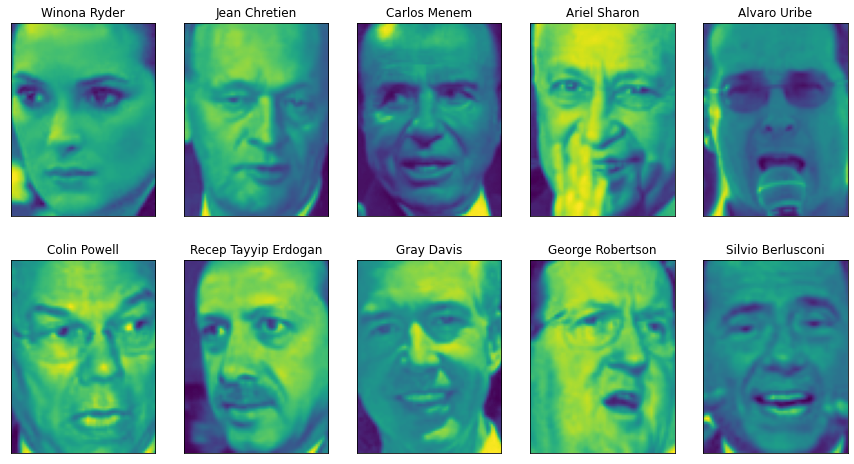

In [15]:
people = fetch_lfw_people(min_faces_per_person = 20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

Formato del dataset de imágenes

In [16]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [17]:
#Se cuenta qué tan seguido aparecen las personaes del dataset
counts = np.bincount(people.target)
#Se imprime el nombre al lado del conteo
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [18]:
#se cambian las imágenes a escala de grises

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

C:\Users\Benja\AppData\Local\Temp\ipykernel_14300\1342917343.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [19]:
#Formato nuevo del dataset luego del cambio a escala de grises
X_people.shape

(2063, 5655)

Se hacen una clasificación de las imágenes por KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


Se reduce la dimensionalidad del dataset a través de un análisis de componentes principales

In [21]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


Se clasifican los datos del dataset de dimensionalidad reducida, resultando en una mejor precisión

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


Ejemplo del resultado a las imágenes de la reducción de dimensionalidad, diferenciandose por la cantidad de componentes usados en PCA

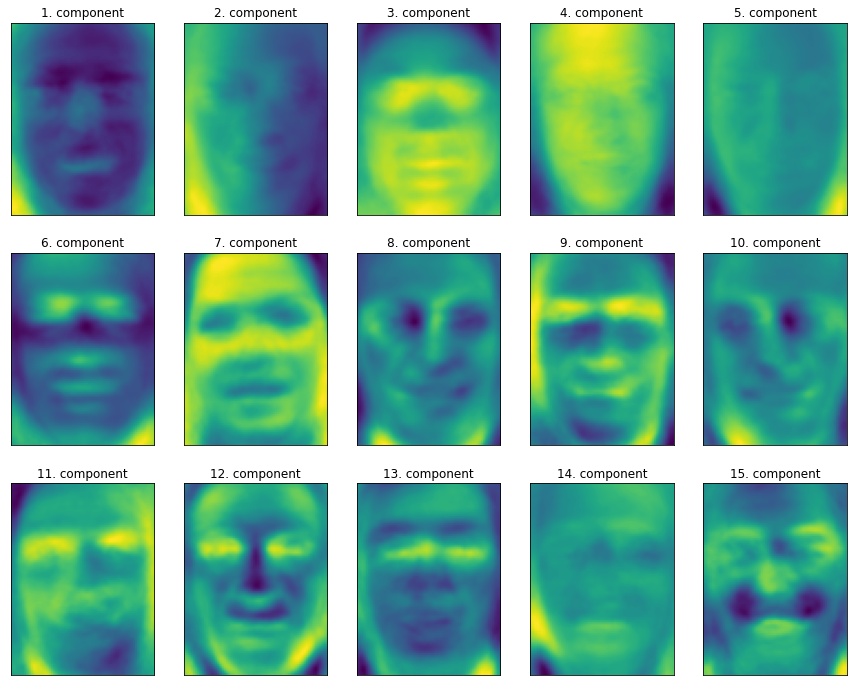

In [24]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
        cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.539869, ..., 0.243137],
       ...,
       [0.043137, ..., 0.593464]], dtype=float32), 
array([[0.237908, ..., 0.267974],
       ...,
       [0.401307, ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 2.0s, 0.0min


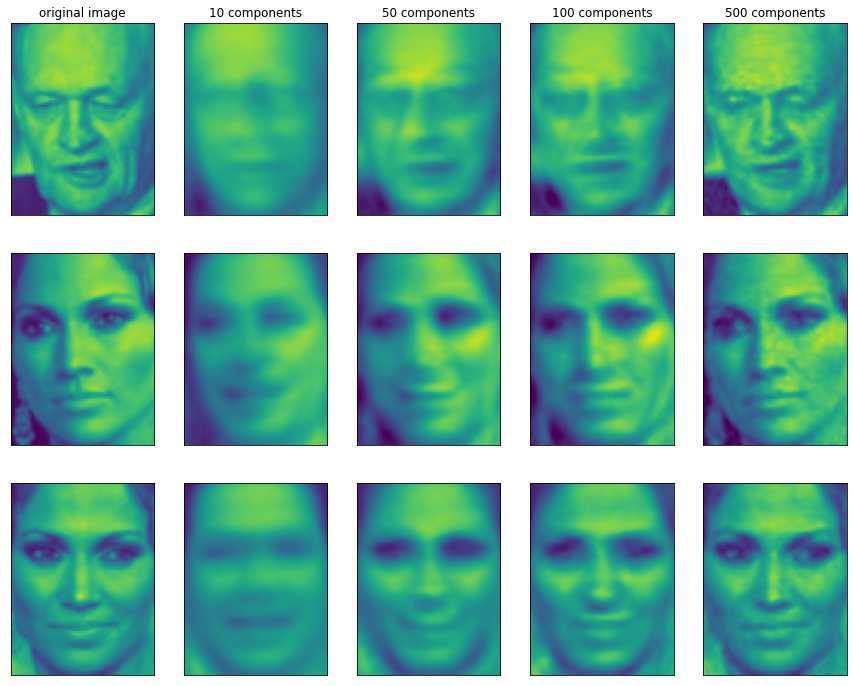

In [25]:
import mglearn

mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

In [26]:
# extract eigenfaces from lfw data and transform data
# dataset con dimensionalidad reducida
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)
print("X_train_pca.shape: {}".format(X_pca.shape))

X_train_pca.shape: (2063, 100)


Se utiliza el algoritmo agglomerative clustering para armar 40 clústers desde los datos del dataset con dimensionalidad reducida.

Se eligen algúnos clústers interesantes, en donde en el primero pareciera que reúne gente sonriéndo, en el segundo gente mirando hacia la izquierda, en el tercero gente con las cejas levantadas y en el cuarto gente con la boca abierta, por desprender algúnos criterios que el algoritmo no supervisado pareciera seguir

cluster sizes agglomerative clustering: [ 72 116  52 101 189 121  44   2 155  24  34  30  29  22   6  71  54 131
  41  53  20  96  30  36  12  61  54   8 182  19   7  17  50   5  22  22
  35  11  27   2]


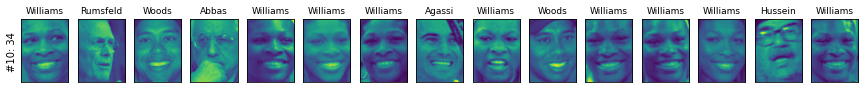

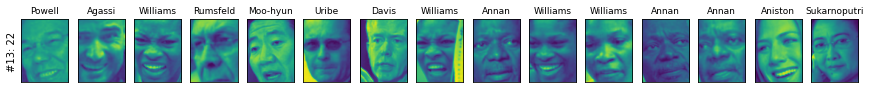

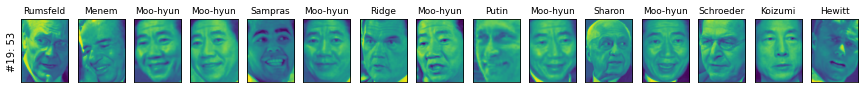

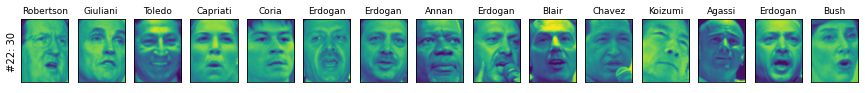

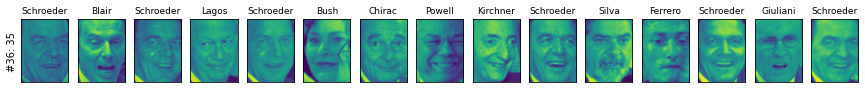

In [27]:
from sklearn.cluster import AgglomerativeClustering 

agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))
n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
        figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)


Para el caso del mismo algoritmo pero con el dataset sin reducción de dimensionalidad, la repartición de imágenes en los clústers parece ser mucho más homogénea, lo que podría significar que el algoritmo no logra encontrar tantas similitudes entre los datos del dataset dado el ruido que incluyen. Por lo mismo, al mostrar algúnos clústers más grandes es más difícil identificar posibles criterios que haya seguido el algoritmo.

cluster sizes agglomerative clustering: [ 86  76 108  73  51  37  47  38  46  58  98 111  55  92  35  85  41  15
  53  27  69  59  63  52  42  32  41  55  36  48  29  21  63  43  12  17
  35  54  16  44]


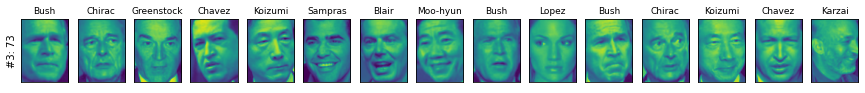

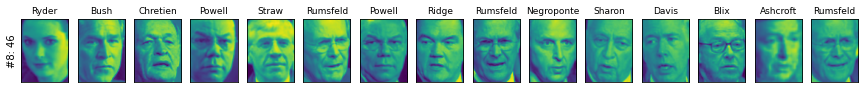

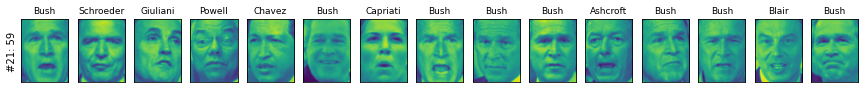

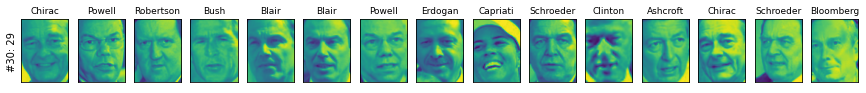

In [28]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_people)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))
n_clusters = 40
for cluster in [3,8,21,30]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
        figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

El algoritmo K-means junto con los datos reducidos por PCA parecen dar algunos clústers interesantes que se muestran abajo, sin embargo los criterios para agrupar las fotos no parecen tan evidentes como los del agglomerative clustering (de todas maneras da resultados mejores que agglomerative sin PCA)

Cluster sizes k-means: [  1  78  21  85  61 110  51  17  91  21  12  36  60  44  79  18  38  18
  71  84  83  91  88  66  69   6  29  70  27  16  54  50   1  16  11  50
  92  51  71 126]


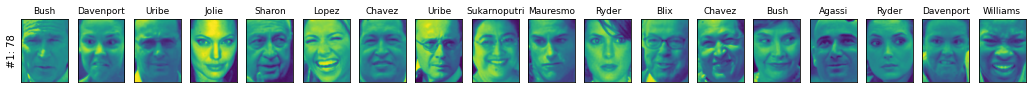

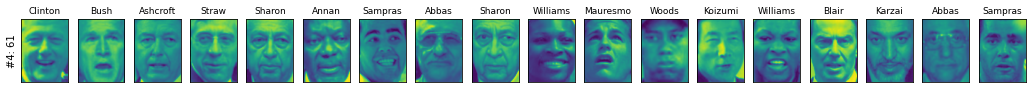

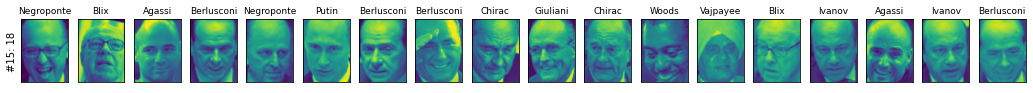

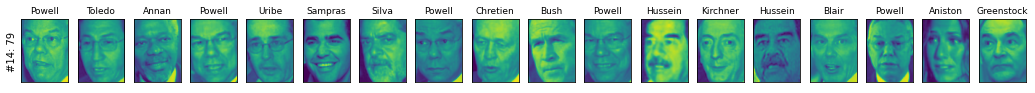

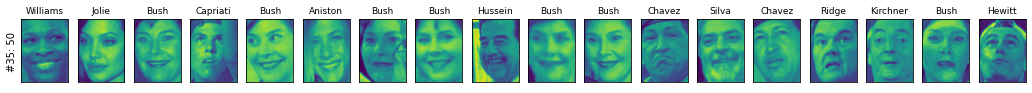

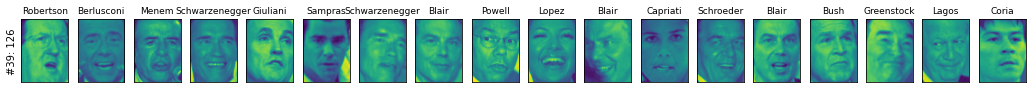

In [29]:
# extract clusters with k-means
from sklearn.cluster import KMeans
km = KMeans(n_clusters=40, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

for cluster in [1,4,15,14,35,39]: # hand-picked "interesting" clusters
    mask = labels_km == cluster
    fig, axes = plt.subplots(1, 18, subplot_kw={'xticks': (), 'yticks': ()},
        figsize=(18, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],labels_km[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize': 9})
    for i in range(cluster_size, 18):
        axes[i].set_visible(False)


Respecto a K-means con el dataset sin reducción de dimensionalidad, en esta caso también se ve una repartición mucho más homogénea de las imágenes dentro de los clústers, y con algúnos clústers con criterios discernibles. Sin perjuicio de lo anterior, el rendimiento de K-means con este dataset es absolutamente pobre en comparación a agglomerative y a sí mismo con el dataset de dimensionalidad reducida.

Cluster sizes k-means: [ 58  58  67  61  27  46  44  70  75  60  74  43  74  53  81  37  70   8
 105  52  40  67  40  26  81  47  38  63  67  41  56  46  43  40  71  24
  61  30  18   1]


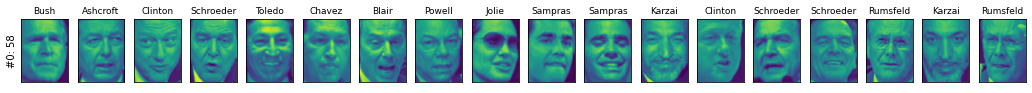

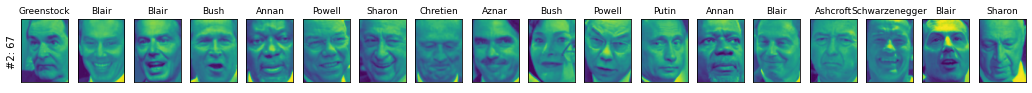

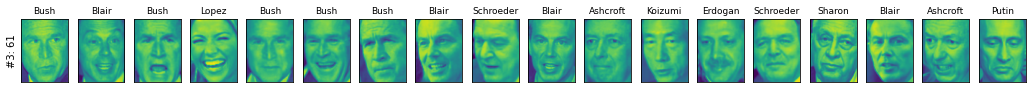

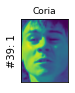

In [30]:
km = KMeans(n_clusters=40, random_state=0)
labels_km = km.fit_predict(X_people)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

for cluster in [0,2,3,39]: # hand-picked "interesting" clusters
    mask = labels_km == cluster
    fig, axes = plt.subplots(1, 18, subplot_kw={'xticks': (), 'yticks': ()},
        figsize=(18, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],labels_km[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize': 9})
    for i in range(cluster_size, 18):
        axes[i].set_visible(False)

Se intenta probar agglomerative con un PCA de 250 componentes, sin embargo los resultados son absolutamente pobres al concentrar casi un tercio del dataset en un sólo clúster. Lo único rescatable es un clúster curioso de 4 fotos que corresponden a personas con gorros

In [31]:
pca = PCA(n_components=250, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

cluster sizes agglomerative clustering: [  4  65  27   2  65  10  25  44 128  78  76 136   7 312   9  13   3 120
  48  38  17  35  64 491   1  12  29  56   4   2  28   1  15  14  10   6
  41   1  25   1]


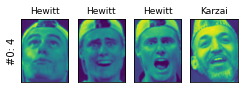

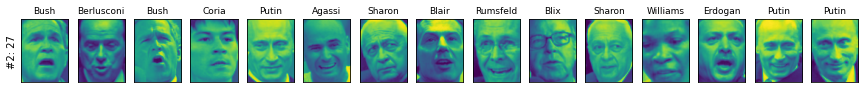

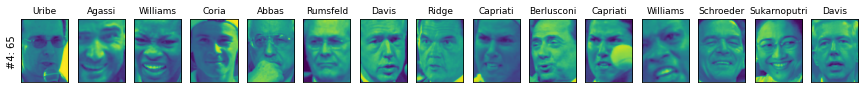

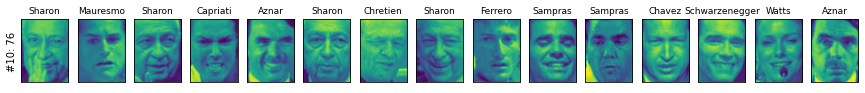

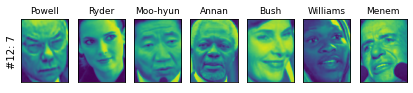

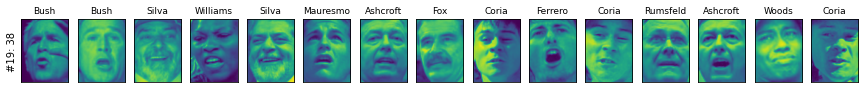

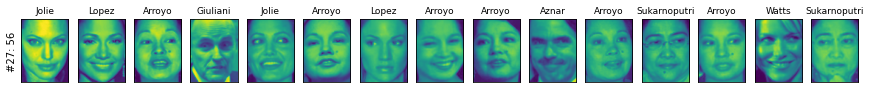

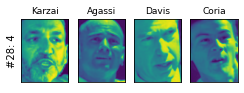

In [32]:
from sklearn.cluster import AgglomerativeClustering 

agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))
n_clusters = 40
for cluster in [0, 2, 4,10,12,19,27,28]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
        figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

Se intenta probar otro método de reducción de dimensionalidad (Non negative matrix factorization) con distintos números de componentes. Sin embargo los resultados no son tan buenos como los de PCA, además de que el rendimiento de NMF al reducir dimensionalidad es bastante pobre frente a PCA (Logrando incluso demorarse un minuto en una reducción de 250 componentes, versus PCA que demoró 0.5 segundos)

In [33]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=100, random_state=0)
S_ = nmf.fit_transform(X_people)
print("Shape: {}".format(S_.shape))

c:\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Shape: (2063, 100)


c:\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


cluster sizes agglomerative clustering: [ 69 122  32  28  52  79  78  34  42  62 115  48  62  74  58 103  75  77
 101  55  61  47  51  26  27  42  33  21  37  25  12  30  19  20  57  18
  18  37  85  31]


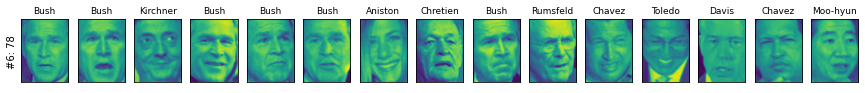

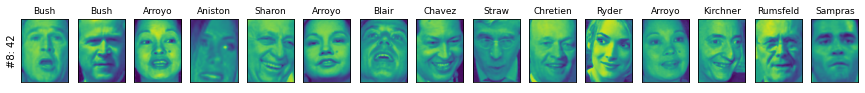

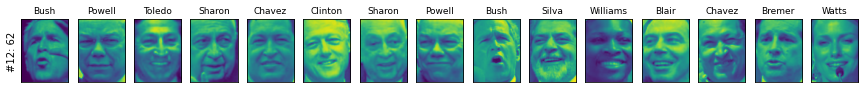

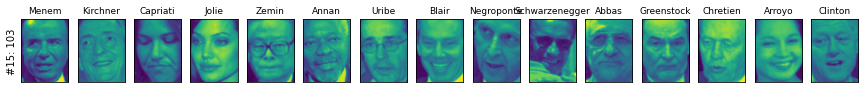

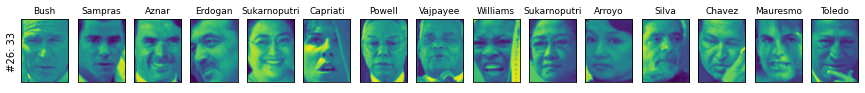

In [34]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(S_)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))
n_clusters = 40
for cluster in [6,8,12,15,26]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
        figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

In [35]:
nmf = NMF(n_components=250, random_state=0)
S_ = nmf.fit_transform(X_people)
print("Shape: {}".format(S_.shape))

c:\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Shape: (2063, 250)


c:\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


cluster sizes agglomerative clustering: [ 45  38  60  39  25  65  61  54  38  88 104  82  26  91  66 192  24  38
  37  63  67  38  23  85  79  65  68  88  35  35  23  30  32   5  18  15
  32  17   7  65]


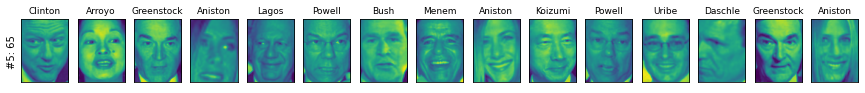

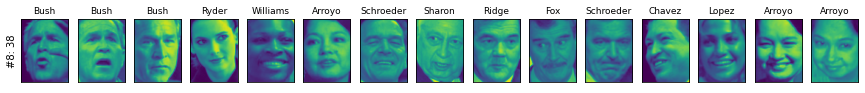

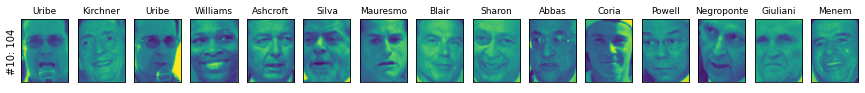

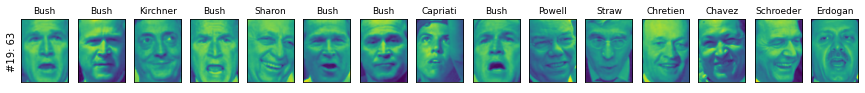

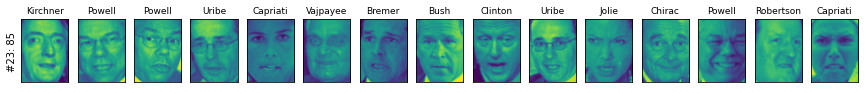

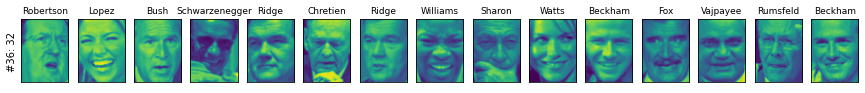

In [36]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(S_)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))
n_clusters = 40
for cluster in [5,8,10,19,23,36]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
        figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)